In [12]:
from mpl_toolkits.basemap import Basemap
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4
def tempheight(month):
    
    nca = netCDF4.Dataset("air.mon.ltm.nc", "r")
    nch = netCDF4.Dataset("hgt.mon.ltm.nc", "r")
    
    #grabbing hgt data...
    lon1_data = nch.variables["lon"][:]
    lat1_data = nch.variables["lat"][:]
    #month_index, hgt_index, lat_index, lon_index
    hgt_data = nch.variables["hgt"][month,5,:,:]
    
    #grabbing air data...
    lon2_data = nca.variables["lon"][:]
    lat2_data = nca.variables["lat"][:]
    #month_index, level_index, lat_index, lon_index
    air_data = nca.variables["air"][month,0,:,:]
    
    
    pylab.rcParams['figure.figsize'] = (8.0, 6.4)
    my_map = Basemap(projection='cyl', resolution = 'l', area_thresh = 1000.0, llcrnrlon=230, llcrnrlat=25, urcrnrlon=300, urcrnrlat=55)
    my_map.drawcoastlines()
    my_map.drawcountries()
    my_map.drawmapboundary()
    my_map.drawmeridians(np.arange(0, 360, 30), labels=[0,0,0,1])
    my_map.drawparallels(np.arange(-90, 90, 15), labels=[1,0,0,0])
    
    lonall1, latall1 = np.meshgrid(lon1_data, lat1_data)
    lonall2, latall2 = np.meshgrid(lon2_data, lat2_data)
    lonproj1, latproj1 = my_map(lonall1, latall1)
    lonproj2, latproj2 = my_map(lonall2, latall2)
    contours = pylab.contour(lonproj1, latproj1, hgt_data, 17, colors='k')
    contours.clabel(fontsize=9, inline=1)
    pylab.contourf(lonproj2, latproj2, air_data, 10, cmap=cm.jet)
    colorbar(orientation='horizontal')
month = float(raw_input("Enter a month to be examined [1-12]: "))
tempheight(month-1)

ImportError: No module named basemap

Enter a month to be analyzed [1-12]: 2


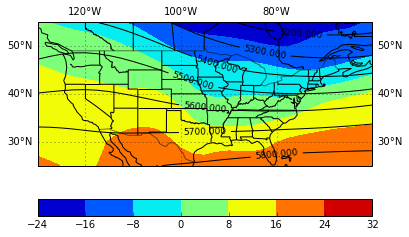

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import numpy as np
import cartopy
import cartopy.crs as ccrs
import netCDF4

def tempheight(month):
    nca = netCDF4.Dataset("air.mon.ltm.nc", "r")
    nch = netCDF4.Dataset("hgt.mon.ltm.nc", "r")
    
    #grabbing latitude and longitude data...
    lon_data = nca.variables["lon"][:]
    lat_data = nca.variables["lat"][:]
    
    #month_index, level_index, lat_indices, lon_indices
    air_data = nca.variables["air"][month,0,14:27,92:121]
    
    #month_index, hgt_index, lat_indices, lon_indices
    hgt_data = nch.variables["hgt"][month,5,14:27,92:121]
    
    #Make the map
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.set_extent([-130,-60,25,55],crs=ccrs.PlateCarree())
    states_provinces = cartopy.feature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    ax.add_feature(states_provinces)
    ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
    
    #add Longitude and Latitude Lines
    gl = ax.gridlines(draw_labels=True)
    gl.xlocator = mticker.FixedLocator([-140, -120, -100, -80, -60])
    gl.ylocator = mticker.FixedLocator([20, 30, 40, 50, 60])
    gl.xlabels_bottom = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    
    #add contour lines and colorbar
    plt.contourf(lon_data[92:121], lat_data[14:27], air_data,
            projection=ccrs.PlateCarree())
    plt.colorbar(orientation='horizontal') #must be called between plt.contourf and plt.contour
    contours = plt.contour(lon_data[92:121], lat_data[14:27], hgt_data,
            projection=ccrs.PlateCarree(), colors='k')
    contours.clabel(fontsize=9, inline=1)
    
month = float(raw_input("Enter a month to be analyzed [1-12]: "))
tempheight(month-1)